In [1]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
from difflib import SequenceMatcher
from Levenshtein import distance as levenshtein_distance
import os
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:


def clean_text(text):
    """
    Effectue des corrections mineures sur les textes OCR.
    - Supprime les espaces superflus.
    - Corrige certains caractères mal reconnus.
    """
    text = text.strip()  # Supprime les espaces en début/fin
    text = text.replace(" ,", ",").replace(" .", ".").replace(" :", ":")  # Corrige les espaces avant la ponctuation
    # text = text.replace("1", "I").replace("0", "O")  # Exemple de substitution courante
    return text

def filter_sequences_with_levenshtein(ocr_texts, cutoff=10):
    """
    Filtre les séquences basées sur la distance de Levenshtein.

    Args:
        ocr_texts (list): Liste de chaînes OCR extraites.
        cutoff (int): Score maximal pour inclure une séquence.

    Returns:
        list: Séquences filtrées basées sur la distance.
    """
    # Nettoyage des textes OCR
    cleaned_texts = [clean_text(text) for text in ocr_texts]

    # Trouver la meilleure séquence (celle avec la plus grande similarité moyenne)
    best_sequence = min(cleaned_texts, key=lambda x: sum(levenshtein_distance(x, y) for y in cleaned_texts if x != y))

    # Filtrer les séquences basées sur la distance de Levenshtein au meilleur texte
    filtered_texts = [
        text for text in cleaned_texts
        if levenshtein_distance(best_sequence, text) <= cutoff
    ]

    return filtered_texts, best_sequence






In [4]:
drive.mount('/content/drive')

def load_texts_from_directory(directory):
    """
    Charge les textes à partir de fichiers dans un répertoire donné.

    Args:
        directory (str): Chemin vers le répertoire contenant les fichiers texte.

    Returns:
        dict: Un dictionnaire où les clés sont les noms des fichiers (sans extension)
              et les valeurs sont les contenus des fichiers.
    """
    texts = {}
    for file_name in os.listdir(directory):
        if file_name.endswith('.txt'):
            file_path = os.path.join(directory, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                texts[file_name.split('.')[0]] = file.read().strip()
    return texts


# Fonction pour calculer les distances pour un OCR donné
def calculate_levenshtein_for_model(true_labels, ocr_labels):
    results = []
    for image_name, true_label in true_labels.items():
        ocr_label = ocr_labels.get(image_name, None)
        if ocr_label is not None:
            # Nettoyer les textes
            true_label_cleaned = clean_text(true_label)
            ocr_label_cleaned = clean_text(ocr_label)

            # Calculer la distance de Levenshtein
            distance = levenshtein_distance(true_label_cleaned, ocr_label_cleaned)

            # Enregistrer le résultat
            results.append((image_name, true_label_cleaned, ocr_label_cleaned, distance))
    return results

# Fonction pour calculer la moyenne des distances
def calculate_average_distance(results):
    return sum(r[3] for r in results) / len(results) if results else 0




# Chemins vers les répertoires
true_labels_dir = "/content/drive/My Drive/Project/Deep Learning/transcriptions_ChatGPT"
easy_ocr_results1_dir = "/content/drive/My Drive/Project/Deep Learning/OCR Results/Easy OCR/EasyOCRResults"
easy_ocr_results2_dir = "/content/drive/My Drive/Project/Deep Learning/OCR Results/Easy OCR/EasyOCRResults2"
easy_ocr_results3_dir = "/content/drive/My Drive/Project/Deep Learning/OCR Results/Easy OCR/EasyOCRResults3"
easy_ocr_results4_dir = "/content/drive/My Drive/Project/Deep Learning/OCR Results/Easy OCR/EasyOCRResults4"
tesseract_ocr_results1_dir = "/content/drive/My Drive/Project/Deep Learning/OCR Results/Tesseract OCR/TesseractOCRResults"
tesseract_ocr_results2_dir = "/content/drive/My Drive/Project/Deep Learning/OCR Results/Tesseract OCR/TesseractOCRResults2"
tesseract_ocr_results3_dir = "/content/drive/My Drive/Project/Deep Learning/OCR Results/Tesseract OCR/TesseractOCRResults3"
tesseract_ocr_results4_dir = "/content/drive/My Drive/Project/Deep Learning/OCR Results/Tesseract OCR/TesseractOCRResults4"


# Charger les textes des répertoires
true_labels = load_texts_from_directory(true_labels_dir)
easy_ocr_labels1 = load_texts_from_directory(easy_ocr_results1_dir)
easy_ocr_labels2 = load_texts_from_directory(easy_ocr_results2_dir)
easy_ocr_labels3 = load_texts_from_directory(easy_ocr_results3_dir)
easy_ocr_labels4 = load_texts_from_directory(easy_ocr_results4_dir)
tesseract_ocr_labels1 = load_texts_from_directory(tesseract_ocr_results1_dir)
tesseract_ocr_labels2 = load_texts_from_directory(tesseract_ocr_results2_dir)
tesseract_ocr_labels3 = load_texts_from_directory(tesseract_ocr_results3_dir)
tesseract_ocr_labels4 = load_texts_from_directory(tesseract_ocr_results4_dir)


# Calcul pour chaque ensemble OCR
easy_ocr_results1 = calculate_levenshtein_for_model(true_labels, easy_ocr_labels1)
easy_ocr_results2 = calculate_levenshtein_for_model(true_labels, easy_ocr_labels2)
easy_ocr_results3 = calculate_levenshtein_for_model(true_labels, easy_ocr_labels3)
easy_ocr_results4 = calculate_levenshtein_for_model(true_labels, easy_ocr_labels4)
tesseract_ocr_results1 = calculate_levenshtein_for_model(true_labels, tesseract_ocr_labels1)
tesseract_ocr_results2 = calculate_levenshtein_for_model(true_labels, tesseract_ocr_labels2)
tesseract_ocr_results3 = calculate_levenshtein_for_model(true_labels, tesseract_ocr_labels3)
tesseract_ocr_results4 = calculate_levenshtein_for_model(true_labels, tesseract_ocr_labels4)


# Calculer les moyennes pour chaque modèle
average_distance_easy_ocr1 = calculate_average_distance(easy_ocr_results1)
average_distance_easy_ocr2 = calculate_average_distance(easy_ocr_results2)
average_distance_easy_ocr3 = calculate_average_distance(easy_ocr_results3)
average_distance_easy_ocr4 = calculate_average_distance(easy_ocr_results4)
average_distance_tesseract_ocr1 = calculate_average_distance(tesseract_ocr_results1)
average_distance_tesseract_ocr2 = calculate_average_distance(tesseract_ocr_results2)
average_distance_tesseract_ocr3 = calculate_average_distance(tesseract_ocr_results3)
average_distance_tesseract_ocr4 = calculate_average_distance(tesseract_ocr_results4)

# Résumer les distances moyennes
model_performances = {
    "EasyOCR 1": average_distance_easy_ocr1,
    "EasyOCR 2": average_distance_easy_ocr2,
    "EasyOCR 3": average_distance_easy_ocr3,
    "EasyOCR 4": average_distance_easy_ocr4,
    "Tesseract OCR 1": average_distance_tesseract_ocr1,
    "Tesseract OCR 2": average_distance_tesseract_ocr2,
    "Tesseract OCR 3": average_distance_tesseract_ocr3,
    "Tesseract OCR 4": average_distance_tesseract_ocr4
}



# Afficher les résultats triés
sorted_performances = sorted(model_performances.items(), key=lambda x: x[1])
print("\nDistances moyennes globales (triées) :\n")
for model, avg_distance in sorted_performances:
    print(f"Modèle : {model}, Distance moyenne : {avg_distance:.2f}")

Mounted at /content/drive

Distances moyennes globales (triées) :

Modèle : Tesseract OCR 1, Distance moyenne : 55.88
Modèle : EasyOCR 1, Distance moyenne : 63.17
Modèle : Tesseract OCR 3, Distance moyenne : 82.49
Modèle : Tesseract OCR 4, Distance moyenne : 86.57
Modèle : EasyOCR 3, Distance moyenne : 88.50
Modèle : EasyOCR 4, Distance moyenne : 103.58
Modèle : Tesseract OCR 2, Distance moyenne : 118.73
Modèle : EasyOCR 2, Distance moyenne : 129.72


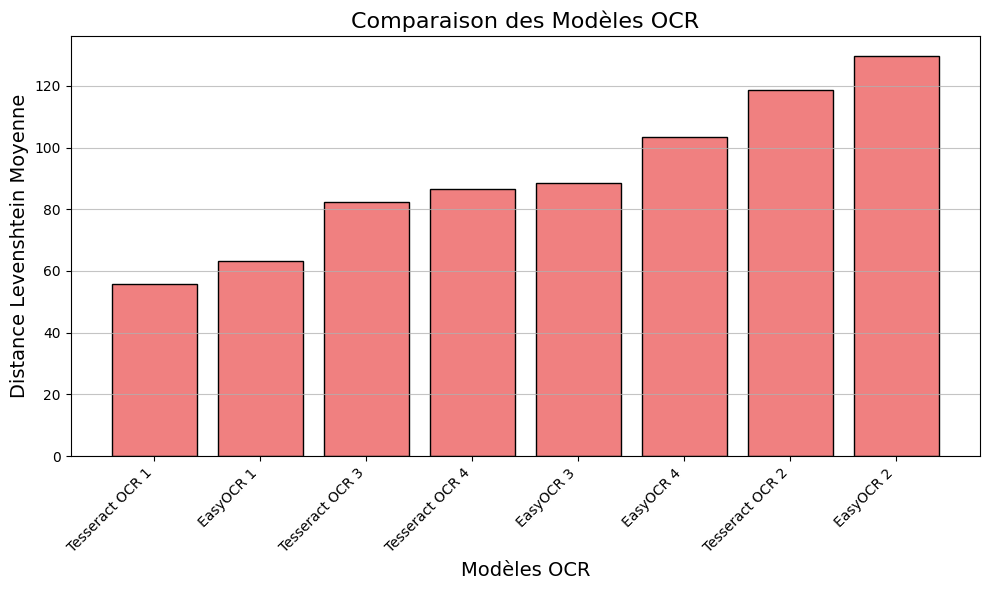

In [5]:
# Visualisation des performances
models = [item[0] for item in sorted_performances]
avg_distances = [item[1] for item in sorted_performances]

plt.figure(figsize=(10, 6))
plt.bar(models, avg_distances, color="lightcoral", edgecolor="black")
plt.xlabel("Modèles OCR", fontsize=14)
plt.ylabel("Distance Levenshtein Moyenne", fontsize=14)
plt.title("Comparaison des Modèles OCR", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.75)
plt.tight_layout()
plt.show()


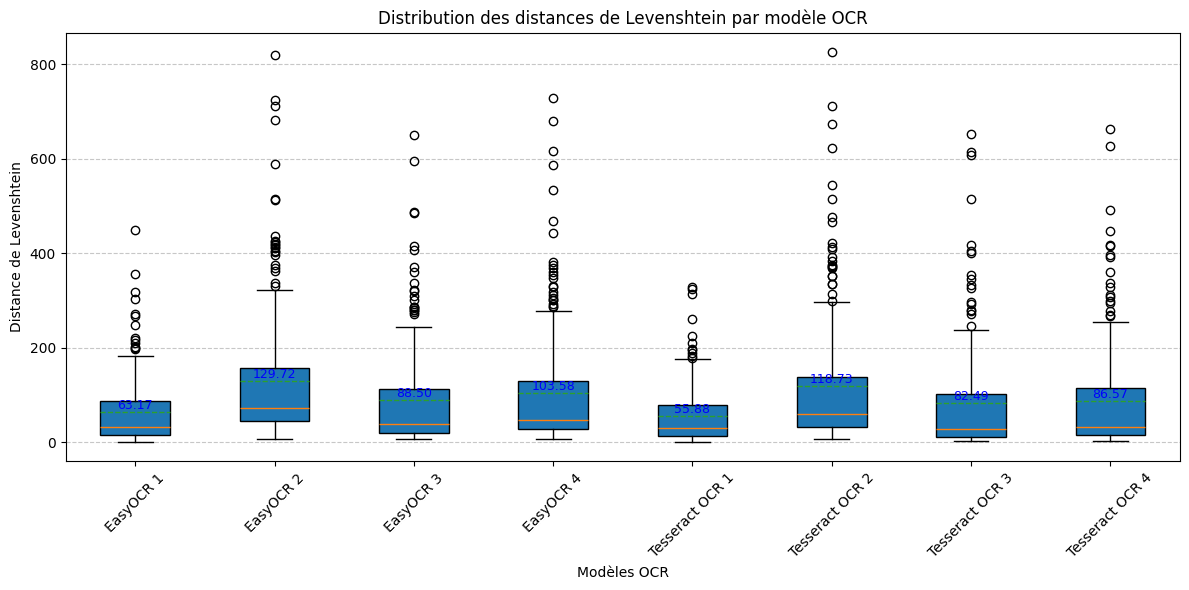

In [6]:
boxplot_data = {
    "EasyOCR 1": [r[3] for r in easy_ocr_results1],
    "EasyOCR 2": [r[3] for r in easy_ocr_results2],
    "EasyOCR 3": [r[3] for r in easy_ocr_results3],
    "EasyOCR 4": [r[3] for r in easy_ocr_results4],
    "Tesseract OCR 1": [r[3] for r in tesseract_ocr_results1],
    "Tesseract OCR 2": [r[3] for r in tesseract_ocr_results2],
    "Tesseract OCR 3": [r[3] for r in tesseract_ocr_results3],
    "Tesseract OCR 4": [r[3] for r in tesseract_ocr_results4],
}

# Créer un boxplot
labels = list(boxplot_data.keys())
data = [boxplot_data[label] for label in labels]

plt.figure(figsize=(12, 6))
plt.boxplot(data, labels=labels, patch_artist=True, showmeans=True, meanline=True)
plt.title("Distribution des distances de Levenshtein par modèle OCR")
plt.xlabel("Modèles OCR")
plt.ylabel("Distance de Levenshtein")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les moyennes sur le graphe
for i, avg_distance in enumerate(model_performances.values(), start=1):
    plt.text(i, avg_distance, f"{avg_distance:.2f}", ha='center', va='bottom', fontsize=9, color='blue')

plt.tight_layout()
plt.show()